In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [11]:
!pip install imutils

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [12]:
%matplotlib inline  
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import tensorflow as tf
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
import argparse
import random
import matplotlib
matplotlib.use("Agg")
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator,img_to_array
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler
from keras.layers import Dropout, Flatten,Activation, Dense
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D,ZeroPadding2D
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint


checkpoint = ModelCheckpoint('./base.model',monitor='val_loss',verbose=1,save_best_only=True,mode='min',
    save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor='val_loss',min_delta=0.001,patience=10,verbose=1,mode='auto')
reduce = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=3,  verbose=1,  mode='auto')
callbacks = [earlystop,checkpoint,reduce]

In [13]:
imagepaths=sorted(list(paths.list_images(r"/kaggle/input/tbclahedataset/lung_clahe")))
print(len(imagepaths))



800


In [14]:
img_size=224
num_classes=2
print("Processing images' NPY file")
data = []
labels = []
random.shuffle(imagepaths)
# loop over the input images
for imagePath in (imagepaths):
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (img_size, img_size))
    image = img_to_array(image)
    data.append(image)
    if imagePath.split(".png")[0][-1] == "1":
      label = 1
    else:
      label= 0
    labels.append(label)
# labels
print("Processing Done")

Processing images' NPY file
Processing Done


In [15]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.1, random_state=40)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes)
testY = to_categorical(testY, num_classes)
channels=(trainX.shape[3])

In [41]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', 
                 input_shape = (img_size,img_size,channels)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))


In [42]:
BS=64
epochs=40
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
H=model.fit(trainX, trainY, epochs=epochs, batch_size=BS, verbose=1, validation_data=(testX, testY),callbacks=callbacks)

Train on 720 samples, validate on 80 samples
Epoch 1/40
720/720 [==============================] - 2s 2ms/step - loss: 0.6958 - accuracy: 0.5292 - val_loss: 0.6937 - val_accuracy: 0.4875

Epoch 00001: val_loss did not improve from 0.23733
Epoch 2/40
720/720 [==============================] - 1s 1ms/step - loss: 0.6942 - accuracy: 0.5042 - val_loss: 0.6932 - val_accuracy: 0.4875

Epoch 00002: val_loss did not improve from 0.23733
Epoch 3/40
720/720 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5014 - val_loss: 0.6923 - val_accuracy: 0.4875

Epoch 00003: val_loss did not improve from 0.23733
Epoch 4/40
720/720 [==============================] - 1s 1ms/step - loss: 0.6855 - accuracy: 0.5111 - val_loss: 0.6738 - val_accuracy: 0.4875

Epoch 00004: val_loss did not improve from 0.23733
Epoch 5/40
720/720 [==============================] - 1s 1ms/step - loss: 0.6598 - accuracy: 0.5514 - val_loss: 0.6804 - val_accuracy: 0.7250

Epoch 00005: val_loss did not improv

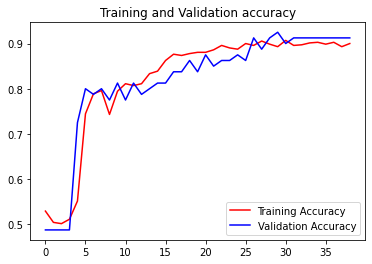

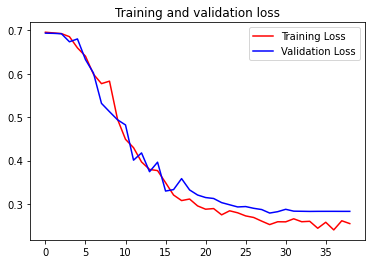

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.95      0.88      0.91        41

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80

[[37  2]
 [ 5 36]]
acc: 0.9125
sensitivity: 0.9487
specificity: 0.8780


In [43]:
%matplotlib inline

accuracy = H.history['accuracy']
val_accuracy = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

predictions = model.predict(testX, batch_size=BS) #Check this
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1)))
cm = confusion_matrix(testY.argmax(axis=1), predictions.argmax(axis=1))
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm) 
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))



In [45]:
 
model.save('/kaggle/working/modelv7.h5') #91.25% accuracy 

SyntaxError: invalid syntax (<ipython-input-45-1c8ef2c0b03e>, line 2)

In [44]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 28, 28, 32)       